In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('survey_results.csv')
df.head()

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
0,R00001,30,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150
1,R00002,46,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250
2,R00003,41,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250
3,R00004,33,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200
4,R00005,23,M,Metro,Student,NaN,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100


In [3]:
df.size

510170

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30010 entries, 0 to 30009
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   respondent_id                   30010 non-null  object
 1   age                             30010 non-null  int64 
 2   gender                          30010 non-null  object
 3   zone                            30010 non-null  object
 4   occupation                      30010 non-null  object
 5   income_levels                   21946 non-null  object
 6   consume_frequency(weekly)       30002 non-null  object
 7   current_brand                   30010 non-null  object
 8   preferable_consumption_size     30010 non-null  object
 9   awareness_of_other_brands       30010 non-null  object
 10  reasons_for_choosing_brands     30010 non-null  object
 11  flavor_preference               30010 non-null  object
 12  purchase_channel                30000 non-null

## **1 - Removing Duplicates**

In [5]:
df.duplicated(subset='respondent_id').sum()

np.int64(10)

In [6]:
df[df.duplicated()]

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
2309,R02309,27,M,Urban,Working Professional,16L - 25L,3-4 times,Newcomer,Small (250 ml),2 to 4,Brand Reputation,Traditional,Online,Simple,Medium (Moderately health-conscious),Social (eg. Parties),150-200
2666,R02665,61,M,Metro,Entrepreneur,16L - 25L,3-4 times,Established,Medium (500 ml),above 4,Brand Reputation,Exotic,Retail Store,Simple,High (Very health-conscious),"Active (eg. Sports, gym)",200-250
5151,R05149,21,M,Semi-Urban,Student,NaN,3-4 times,Established,Small (250 ml),2 to 4,Availability,Traditional,Retail Store,Simple,Low (Not very concerned),"Active (eg. Sports, gym)",50-100
7794,R07791,25,M,Metro,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Exotic,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),100-150
8516,R08512,20,F,Metro,Student,NaN,5-7 times,Established,Large (1 L),0 to 1,Price,Exotic,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),100-150
11317,R11312,18,F,Urban,Student,NaN,0-2 times,Newcomer,Medium (500 ml),2 to 4,Availability,Exotic,Online,Premium,Medium (Moderately health-conscious),Social (eg. Parties),100-150
19050,R19044,57,M,Semi-Urban,Retired,<10L,3-4 times,Newcomer,Large (1 L),2 to 4,Price,Traditional,Retail Store,Premium,High (Very health-conscious),Social (eg. Parties),150-200
22412,R22405,26,M,Metro,Working Professional,16L - 25L,0-2 times,Newcomer,Small (250 ml),0 to 1,Price,Exotic,Online,Premium,Low (Not very concerned),"Active (eg. Sports, gym)",150-200
23406,R23398,27,M,Urban,Working Professional,10L - 15L,5-7 times,Newcomer,Large (1 L),above 4,Availability,Traditional,Online,Premium,High (Very health-conscious),Casual (eg. At home),200-250
25068,R25059,34,F,Urban,Working Professional,16L - 25L,0-2 times,Newcomer,Small (250 ml),2 to 4,Brand Reputation,Exotic,Online,Eco-Friendly,High (Very health-conscious),"Active (eg. Sports, gym)",150-200


In [7]:
df[df.duplicated(subset='respondent_id', keep=False)]

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
2308,R02309,27,M,Urban,Working Professional,16L - 25L,3-4 times,Newcomer,Small (250 ml),2 to 4,Brand Reputation,Traditional,Online,Simple,Medium (Moderately health-conscious),Social (eg. Parties),150-200
2309,R02309,27,M,Urban,Working Professional,16L - 25L,3-4 times,Newcomer,Small (250 ml),2 to 4,Brand Reputation,Traditional,Online,Simple,Medium (Moderately health-conscious),Social (eg. Parties),150-200
2665,R02665,61,M,Metro,Entrepreneur,16L - 25L,3-4 times,Established,Medium (500 ml),above 4,Brand Reputation,Exotic,Retail Store,Simple,High (Very health-conscious),"Active (eg. Sports, gym)",200-250
2666,R02665,61,M,Metro,Entrepreneur,16L - 25L,3-4 times,Established,Medium (500 ml),above 4,Brand Reputation,Exotic,Retail Store,Simple,High (Very health-conscious),"Active (eg. Sports, gym)",200-250
5150,R05149,21,M,Semi-Urban,Student,NaN,3-4 times,Established,Small (250 ml),2 to 4,Availability,Traditional,Retail Store,Simple,Low (Not very concerned),"Active (eg. Sports, gym)",50-100
5151,R05149,21,M,Semi-Urban,Student,NaN,3-4 times,Established,Small (250 ml),2 to 4,Availability,Traditional,Retail Store,Simple,Low (Not very concerned),"Active (eg. Sports, gym)",50-100
7793,R07791,25,M,Metro,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Exotic,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),100-150
7794,R07791,25,M,Metro,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Exotic,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),100-150
8515,R08512,20,F,Metro,Student,NaN,5-7 times,Established,Large (1 L),0 to 1,Price,Exotic,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),100-150
8516,R08512,20,F,Metro,Student,NaN,5-7 times,Established,Large (1 L),0 to 1,Price,Exotic,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),100-150


In [8]:
df = df.drop_duplicates(subset='respondent_id')
df.duplicated(subset='respondent_id').sum()

np.int64(0)

## **2 - Outlier Detection in Age Column** 

In [9]:
df.describe()

,age
count,30000.000000
mean,33.048167
std,13.438904
min,18.000000
25%,23.000000
50%,31.000000
75%,40.000000
max,604.000000


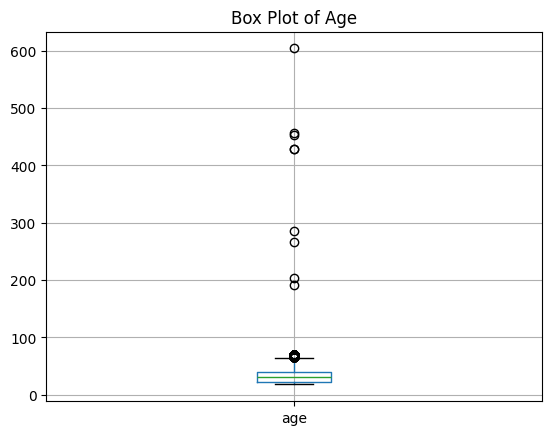

In [10]:
df.boxplot(column='age');
plt.title("Box Plot of Age")
plt.show();

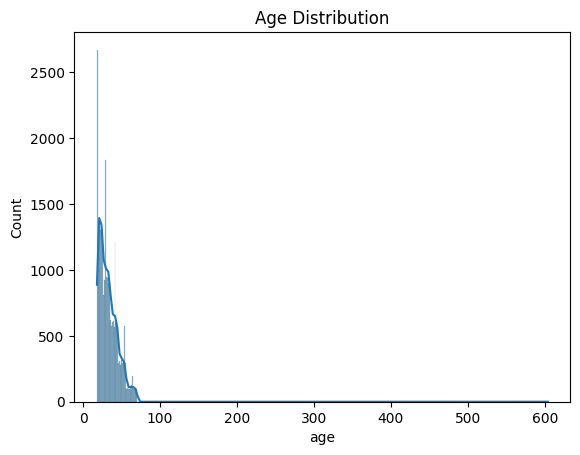

In [11]:
sns.histplot(data=df, x='age', kde=True)
plt.title("Age Distribution")
plt.show();

In [12]:
Q3 = df['age'].quantile(0.75)
Q1 = df['age'].quantile(0.25)

IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
(lower_bound, upper_bound)
# Filter the data
df_filtered = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

In [13]:
df_filtered.describe()

,age
count,29507.000000
mean,32.373132
std,11.117786
min,18.000000
25%,23.000000
50%,30.000000
75%,40.000000
max,65.000000


In [14]:
df[(df['age'] <= lower_bound) | (df['age'] >= upper_bound)]

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
71,R00072,70,F,Urban,Entrepreneur,<10L,3-4 times,Established,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Low (Not very concerned),Casual (eg. At home),150-200
117,R00118,68,F,Metro,Retired,10L - 15L,5-7 times,Established,Small (250 ml),0 to 1,Price,Traditional,Retail Store,Simple,High (Very health-conscious),Casual (eg. At home),150-200
215,R00216,67,M,Metro,Entrepreneur,10L - 15L,5-7 times,Established,Medium (500 ml),above 4,Availability,Exotic,Retail Store,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250
304,R00305,66,F,Rural,Retired,<10L,3-4 times,Newcomer,Small (250 ml),2 to 4,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),100-150
392,R00393,69,F,Semi-Urban,Retired,<10L,5-7 times,Newcomer,Large (1 L),0 to 1,Availability,Exotic,Online,Simple,High (Very health-conscious),Casual (eg. At home),150-200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29872,R29863,66,M,Urban,Retired,<10L,5-7 times,Newcomer,Large (1 L),2 to 4,Price,Traditional,Retail Store,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",150-200
29942,R29933,70,M,Semi-Urban,Retired,16L - 25L,5-7 times,Established,Small (250 ml),0 to 1,Brand Reputation,Exotic,Online,Simple,Low (Not very concerned),Casual (eg. At home),100-150
29944,R29935,67,M,Urban,Retired,<10L,5-7 times,Newcomer,Large (1 L),0 to 1,Price,Traditional,Retail Store,Simple,High (Very health-conscious),Social (eg. Parties),200-250
29985,R29976,70,F,Urban,Retired,<10L,3-4 times,Newcomer,Small (250 ml),0 to 1,Price,Traditional,Retail Store,Simple,High (Very health-conscious),Casual (eg. At home),150-200


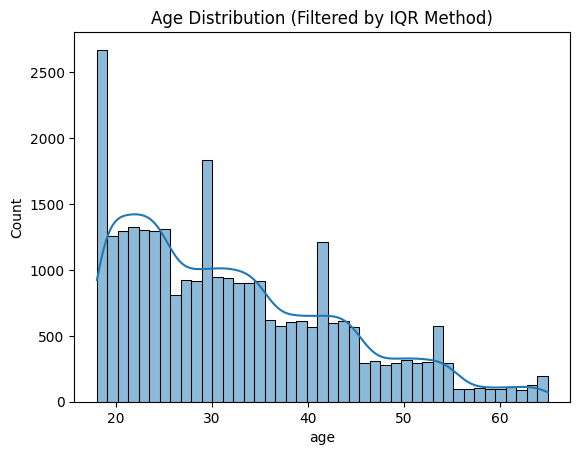

In [15]:
# Plot the histogram with KDE
sns.histplot(data=df_filtered, x='age', kde=True)
plt.title("Age Distribution (Filtered by IQR Method)")
plt.show()

In [16]:
# Calculate mean and std deviation
mean = df['age'].mean()
std_dev = df['age'].std()

# Define bounds
lower_bound = mean - 3 * std_dev
upper_bound = mean + 3 * std_dev

# Filter the data
df_filtered = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

In [17]:
df[(df['age'] <= lower_bound) | (df['age'] >= upper_bound)]

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
3099,R03098,453,M,Metro,Working Professional,26L - 35L,3-4 times,Established,Medium (500 ml),2 to 4,Brand Reputation,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250
6262,R06260,428,M,Urban,Entrepreneur,16L - 25L,5-7 times,Established,Large (1 L),above 4,Quality,Exotic,Online,Simple,High (Very health-conscious),Social (eg. Parties),200-250
12403,R12398,604,M,Metro,Retired,<10L,0-2 times,Newcomer,Small (250 ml),2 to 4,Availability,Traditional,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),100-150
22549,R22542,457,M,Metro,Working Professional,16L - 25L,3-4 times,Newcomer,Small (250 ml),2 to 4,Price,Traditional,Online,Premium,High (Very health-conscious),Casual (eg. At home),200-250
22918,R22911,267,F,Metro,Working Professional,16L - 25L,3-4 times,Established,Medium (500 ml),above 4,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200
24958,R24950,285,M,Semi-Urban,Working Professional,> 35L,0-2 times,Newcomer,Small (250 ml),2 to 4,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",150-200
24960,R24952,192,F,Urban,Student,NaN,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Low (Not very concerned),"Active (eg. Sports, gym)",50-100
25105,R25096,203,M,Metro,Working Professional,16L - 25L,0-2 times,Established,Small (250 ml),2 to 4,Brand Reputation,Exotic,Retail Store,Premium,High (Very health-conscious),"Active (eg. Sports, gym)",150-200
28770,R28761,428,F,Rural,Working Professional,26L - 35L,0-2 times,Established,Small (250 ml),2 to 4,Brand Reputation,Exotic,Online,Simple,Medium (Moderately health-conscious),Casual (eg. At home),150-200


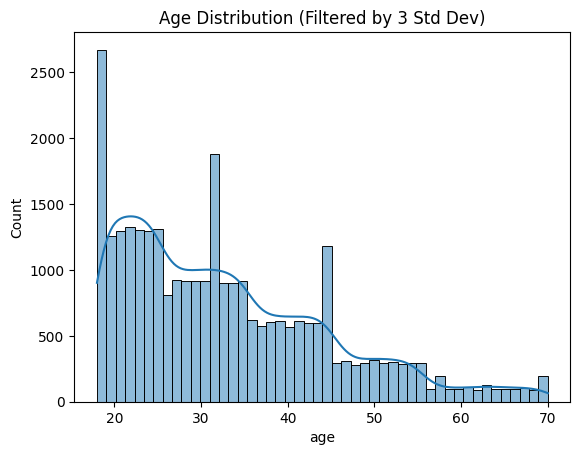

In [18]:
# Plot the histogram with KDE
sns.histplot(data=df_filtered, x='age', kde=True)
plt.title("Age Distribution (Filtered by 3 Std Dev)")
plt.show()

In [19]:
df_filtered.age.describe()

count    29991.000000
mean        32.947484
std         11.906077
min         18.000000
25%         23.000000
50%         31.000000
75%         40.000000
max         70.000000
Name: age, dtype: float64

## **Handling Missing Data - Income Column**

In [20]:
df_filtered.isna().sum()

respondent_id                        0
age                                  0
gender                               0
zone                                 0
occupation                           0
income_levels                     8060
consume_frequency(weekly)            8
current_brand                        0
preferable_consumption_size          0
awareness_of_other_brands            0
reasons_for_choosing_brands          0
flavor_preference                    0
purchase_channel                    10
packaging_preference                 0
health_concerns                      0
typical_consumption_situations       0
price_range                          0
dtype: int64

In [21]:
df_filtered.income_levels.describe()

count         21931
unique            5
top       16L - 25L
freq           5897
Name: income_levels, dtype: object

In [22]:
df_filtered.income_levels.mode()

0    16L - 25L
Name: income_levels, dtype: object

In [23]:
df_filtered.income_levels.unique()

array(['<10L', '> 35L', '16L - 25L', nan, '10L - 15L', '26L - 35L'],
      dtype=object)

### *Imputing null values with "Not Reported"*

In [24]:
df_filtered.loc[:,'income_levels'] = df_filtered.loc[:,'income_levels'].fillna('Not Reported')
df_filtered.isna().sum()

respondent_id                      0
age                                0
gender                             0
zone                               0
occupation                         0
income_levels                      0
consume_frequency(weekly)          8
current_brand                      0
preferable_consumption_size        0
awareness_of_other_brands          0
reasons_for_choosing_brands        0
flavor_preference                  0
purchase_channel                  10
packaging_preference               0
health_concerns                    0
typical_consumption_situations     0
price_range                        0
dtype: int64

In [25]:
df_filtered.income_levels.unique()

array(['<10L', '> 35L', '16L - 25L', 'Not Reported', '10L - 15L',
       '26L - 35L'], dtype=object)

## **Handling Missing Data - consume_frequency(weekly) Column**

In [26]:
df_filtered['consume_frequency(weekly)'].info()

<class 'pandas.core.series.Series'>
Index: 29991 entries, 0 to 30009
Series name: consume_frequency(weekly)
Non-Null Count  Dtype 
--------------  ----- 
29983 non-null  object
dtypes: object(1)
memory usage: 468.6+ KB


In [27]:
null_values_count = df_filtered['consume_frequency(weekly)'].isna().sum()
null_values_count

np.int64(8)

In [28]:
df_filtered['consume_frequency(weekly)'].unique()

array(['3-4 times', '5-7 times', '0-2 times', nan], dtype=object)

In [29]:
mode_value = df_filtered['consume_frequency(weekly)'].mode()
mode_value

0    3-4 times
Name: consume_frequency(weekly), dtype: object

In [30]:
df_filtered['consume_frequency(weekly)'].value_counts(normalize=True)

consume_frequency(weekly)
3-4 times    0.393089
5-7 times    0.325985
0-2 times    0.280926
Name: proportion, dtype: float64

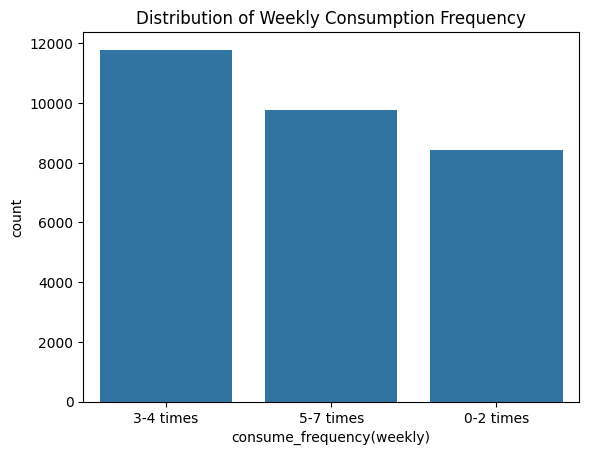

In [31]:
sns.countplot(x='consume_frequency(weekly)', data=df_filtered)
plt.title("Distribution of Weekly Consumption Frequency")
plt.show()

In [32]:
mode_value = df_filtered['consume_frequency(weekly)'].mode()[0]
mode_percentage = df_filtered['consume_frequency(weekly)'].value_counts(normalize=True).iloc[0] * 100

print(f"Mode: {mode_value}, Percentage: {mode_percentage:.2f}%")


Mode: 3-4 times, Percentage: 39.31%


### *Imputing null values with mode*

In [33]:
df_filtered.loc[:,'consume_frequency(weekly)'] = df_filtered.loc[:,'consume_frequency(weekly)'].fillna('3-4 times')

In [34]:
df_filtered.isna().sum()

respondent_id                      0
age                                0
gender                             0
zone                               0
occupation                         0
income_levels                      0
consume_frequency(weekly)          0
current_brand                      0
preferable_consumption_size        0
awareness_of_other_brands          0
reasons_for_choosing_brands        0
flavor_preference                  0
purchase_channel                  10
packaging_preference               0
health_concerns                    0
typical_consumption_situations     0
price_range                        0
dtype: int64

## **Handling Missing Data - purchase_channels Column**

In [35]:
df_filtered['purchase_channel'].unique()

array(['Online', 'Retail Store', nan], dtype=object)

In [36]:
df_filtered['purchase_channel'].mode()

0    Online
Name: purchase_channel, dtype: object

In [37]:
df_filtered['purchase_channel'].value_counts(normalize=True)

purchase_channel
Online          0.552417
Retail Store    0.447583
Name: proportion, dtype: float64

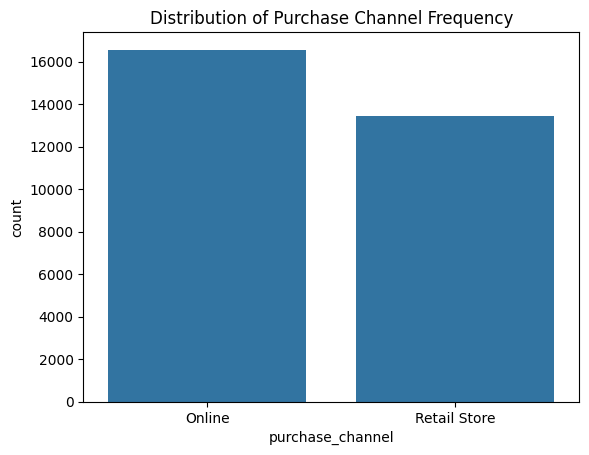

In [38]:
sns.countplot(x='purchase_channel', data=df_filtered)
plt.title("Distribution of Purchase Channel Frequency")
plt.show()

### *Imputing null values with mode*

In [39]:
df_filtered.loc[:,'purchase_channel'] = df_filtered.loc[:,'purchase_channel'].fillna('Online')
df_filtered['purchase_channel'].unique()

array(['Online', 'Retail Store'], dtype=object)

In [40]:
df_filtered.isna().sum()

respondent_id                     0
age                               0
gender                            0
zone                              0
occupation                        0
income_levels                     0
consume_frequency(weekly)         0
current_brand                     0
preferable_consumption_size       0
awareness_of_other_brands         0
reasons_for_choosing_brands       0
flavor_preference                 0
purchase_channel                  0
packaging_preference              0
health_concerns                   0
typical_consumption_situations    0
price_range                       0
dtype: int64

## **Correcting Spelling Mistakes in Categorical Data**

In [41]:
df_filtered['zone'].unique()

array(['Urban', 'Metro', 'Rural', 'Semi-Urban', 'Metor', 'urbna'],
      dtype=object)

In [42]:
df_filtered['zone'].value_counts()

zone
Metro         11906
Urban         10686
Semi-Urban     5274
Rural          2116
urbna             5
Metor             4
Name: count, dtype: int64

In [43]:
df_filtered.loc[:,'zone'] = df_filtered.loc[:,'zone'].replace('Metor', 'Metro')
df_filtered['zone'].unique()

array(['Urban', 'Metro', 'Rural', 'Semi-Urban', 'urbna'], dtype=object)

In [44]:
df_filtered.loc[:,'zone'] = df_filtered.loc[:,'zone'].replace('urbna', 'Urban')

In [45]:
df_filtered['zone'].unique()

array(['Urban', 'Metro', 'Rural', 'Semi-Urban'], dtype=object)

In [46]:
df_filtered['current_brand'].unique()

array(['Newcomer', 'Established', 'newcomer', 'Establishd'], dtype=object)

In [47]:
df_filtered.loc[:,'current_brand'] = df_filtered.loc[:,'current_brand'].replace('newcomer', 'Newcomer')
df_filtered.loc[:,'current_brand'] = df_filtered.loc[:,'current_brand'].replace('Establishd', 'Established')

In [48]:
df_filtered['current_brand'].unique()

array(['Newcomer', 'Established'], dtype=object)

## **Feature Engineering**

### *1 - Categorize Age into Age Groups*

In [49]:
df = df_filtered.copy()
df.head()

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
0,R00001,30,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150
1,R00002,46,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250
2,R00003,41,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250
3,R00004,33,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200
4,R00005,23,M,Metro,Student,Not Reported,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100


In [50]:
def categorize_age(age):

    if age >= 18 and age <= 25:
        return "18-25"
    elif age >= 26 and age <= 35:
        return "26-35"
    elif age >= 36 and age <= 45:
        return "36-45"
    elif age >= 46 and age <= 55:
        return "46-55"
    elif age >= 56 and age <= 70:
        return "56-70"
    elif age > 70:
        return "70+"

In [51]:
df.loc[:,'age_group'] = df['age'].apply(categorize_age)
df.loc[:,'age_group'].value_counts()

age_group
18-25    10468
26-35     9093
36-45     5972
46-55     2966
56-70     1492
Name: count, dtype: int64

In [52]:
df = df.drop('age', axis=1)
df

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group
0,R00001,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35
1,R00002,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55
2,R00003,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45
3,R00004,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200,26-35
4,R00005,M,Metro,Student,Not Reported,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,18-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30005,R29996,M,Metro,Working Professional,16L - 25L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Online,Simple,High (Very health-conscious),Social (eg. Parties),150-200,26-35
30006,R29997,F,Urban,Working Professional,> 35L,3-4 times,Established,Small (250 ml),2 to 4,Quality,Traditional,Online,Premium,Low (Not very concerned),"Active (eg. Sports, gym)",200-250,36-45
30007,R29998,F,Metro,Retired,<10L,0-2 times,Established,Medium (500 ml),0 to 1,Price,Traditional,Retail Store,Premium,High (Very health-conscious),Casual (eg. At home),150-200,56-70
30008,R29999,M,Urban,Working Professional,16L - 25L,5-7 times,Established,Small (250 ml),above 4,Quality,Exotic,Online,Eco-Friendly,Medium (Moderately health-conscious),Social (eg. Parties),150-200,18-25


### *2 - Create `cf_ab_score` (Consume Frequency and Awareness Brand Score)*

In [53]:
df['consume_frequency(weekly)'].value_counts()

consume_frequency(weekly)
3-4 times    11794
5-7 times     9774
0-2 times     8423
Name: count, dtype: int64

In [54]:
df['awareness_of_other_brands'].value_counts()

awareness_of_other_brands
0 to 1     12966
2 to 4     11225
above 4     5800
Name: count, dtype: int64

In [55]:
import numpy as np

def calc_cf_ab_score(data):
    frequency_score = 0
    awareness_score = 0
    data

    if data['consume_frequency(weekly)'] == "0-2 times":
        frequency_score = 1
    elif data['consume_frequency(weekly)'] == "3-4 times":
        frequency_score = 2
    elif data['consume_frequency(weekly)'] == "5-7 times":
        frequency_score = 3

    if data['awareness_of_other_brands'] == "0 to 1":
        awareness_score = 1
    elif data['awareness_of_other_brands'] == "2 to 4":
        awareness_score = 2
    elif data['awareness_of_other_brands'] == "above 4":
        awareness_score = 3

    cf_ab_score = frequency_score/(awareness_score + frequency_score)

    return np.round(cf_ab_score,2)

In [56]:
df.loc[:,'cf_ab_score'] = df.apply(calc_cf_ab_score, axis=1)

In [57]:
df[['consume_frequency(weekly)', 'awareness_of_other_brands', 'cf_ab_score']].sample(10)

,consume_frequency(weekly),awareness_of_other_brands,cf_ab_score
12103,5-7 times,2 to 4,0.60
22036,0-2 times,above 4,0.25
28098,5-7 times,2 to 4,0.60
13434,5-7 times,above 4,0.50
273,5-7 times,0 to 1,0.75
25017,5-7 times,0 to 1,0.75
15348,3-4 times,2 to 4,0.50
15206,3-4 times,0 to 1,0.67
20651,3-4 times,0 to 1,0.67
23274,3-4 times,0 to 1,0.67


In [58]:
df['cf_ab_score'].describe()

count    29991.000000
mean         0.537350
std          0.141866
min          0.250000
25%          0.500000
50%          0.500000
75%          0.670000
max          0.750000
Name: cf_ab_score, dtype: float64

### *3 - Create Zone Affluence Score (ZAS)*

In [59]:
df.head()

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score
0,R00001,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35,0.67
1,R00002,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55,0.60
2,R00003,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45,0.50
3,R00004,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200,26-35,0.75
4,R00005,M,Metro,Student,Not Reported,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,18-25,0.67


In [60]:
def calc_zas(data):
    zone_score = 0
    income_score = 0

    if data["zone"] == "Rural":
        zone_score = 1
    elif data["zone"] == "Semi-Urban":
        zone_score = 2
    elif data["zone"] == "Urban":
        zone_score = 3
    elif data["zone"] == "Metro":
        zone_score = 4

    if data["income_levels"] == "<10L":
        income_score = 1
    elif data["income_levels"] == "10L - 15L":
        income_score = 2
    elif data["income_levels"] == "16L - 25L":
        income_score = 3
    elif data["income_levels"] == "26L - 35L":
        income_score = 4
    elif data["income_levels"] == "> 35L":
        income_score = 5
    elif data["income_levels"] == "Not Reported":
        income_score = 0

    zas_score = zone_score * income_score
    return zas_score

In [61]:
df.loc[:,'zas_score'] = df[['zone', 'income_levels']].apply(calc_zas, axis=1)
df.head()

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score,zas_score
0,R00001,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35,0.67,3
1,R00002,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55,0.60,20
2,R00003,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45,0.50,5
3,R00004,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200,26-35,0.75,9
4,R00005,M,Metro,Student,Not Reported,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,18-25,0.67,0


In [62]:
df[['zone', 'income_levels', 'zas_score']].sample(5)

,zone,income_levels,zas_score
29221,Metro,16L - 25L,12
1956,Metro,10L - 15L,8
18148,Metro,Not Reported,0
14782,Metro,<10L,4
11381,Semi-Urban,<10L,2


In [63]:
df[['zone', 'income_levels', 'zas_score']].describe()

,zas_score
count,29991.000000
mean,6.096529
std,5.517959
min,0.000000
25%,0.000000
50%,6.000000
75%,9.000000
max,20.000000


In [64]:
df[df['zas_score'] == 20][['zone', 'income_levels', 'zas_score']]

,zone,income_levels,zas_score
1,Metro,> 35L,20
28,Metro,> 35L,20
39,Metro,> 35L,20
131,Metro,> 35L,20
148,Metro,> 35L,20
...,...,...,...
29874,Metro,> 35L,20
29891,Metro,> 35L,20
29911,Metro,> 35L,20
29917,Metro,> 35L,20


In [65]:
df['zas_score'].value_counts()

zas_score
0     8060
12    3671
4     3082
6     2991
8     2739
3     2085
9     2041
16    1508
2     1257
20     921
15     807
10     379
1      307
5      143
Name: count, dtype: int64

In [66]:
df['zas_score'].unique() # 14 unique values

array([ 3, 20,  5,  9,  0,  6, 12,  2,  4,  8, 15, 16,  1, 10])

### *4 - Brand Switching Indicator (BSI)*

In [67]:
df.head()

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score,zas_score
0,R00001,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35,0.67,3
1,R00002,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55,0.60,20
2,R00003,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45,0.50,5
3,R00004,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200,26-35,0.75,9
4,R00005,M,Metro,Student,Not Reported,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,18-25,0.67,0


In [68]:
df['current_brand'].unique()

array(['Newcomer', 'Established'], dtype=object)

In [69]:
df['reasons_for_choosing_brands'].unique()

array(['Price', 'Quality', 'Availability', 'Brand Reputation'],
      dtype=object)

In [70]:
# Create a binary indicator column `bsi` that identifies if a respondent is
# likely to switch brands.

def calc_bsi(data):
    bsi = 0
    if data['current_brand'] != 'Established' and (data['reasons_for_choosing_brands'] == 'Price' or data['reasons_for_choosing_brands'] == 'Quality'):
        bsi = 1
    else:
        bsi = 0

    return bsi

In [71]:
df.loc[:,'bsi'] = df[['current_brand','reasons_for_choosing_brands']].apply(calc_bsi, axis=1)
df.head()

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score,zas_score,bsi
0,R00001,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35,0.67,3,1
1,R00002,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55,0.60,20,0
2,R00003,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45,0.50,5,0
3,R00004,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200,26-35,0.75,9,0
4,R00005,M,Metro,Student,Not Reported,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,18-25,0.67,0,0


In [72]:
df[['current_brand','reasons_for_choosing_brands','bsi']].sample(5)

,current_brand,reasons_for_choosing_brands,bsi
24398,Newcomer,Price,1
4097,Established,Price,0
5647,Established,Price,0
13645,Newcomer,Quality,1
27871,Established,Price,0


### *5 - Removing Logical Outliers*

In [73]:
pd.crosstab(df['age_group'], df['occupation'])

occupation,Entrepreneur,Retired,Student,Working Professional
age_group,,,,
18-25,535,0,7328,2605
26-35,1826,0,697,6570
36-45,1619,0,0,4353
46-55,799,0,0,2167
56-70,221,1130,35,106


In [74]:
len(df[(df['age_group'] == '56-70') & (df['occupation'] == 'Student')])

35

In [75]:
df[(df['age_group'] == '56-70') & (df['occupation'] == 'Student')].head()

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score,zas_score,bsi
182,R00183,F,Urban,Student,Not Reported,5-7 times,Established,Large (1 L),above 4,Price,Exotic,Retail Store,Simple,Medium (Moderately health-conscious),Casual (eg. At home),150-200,56-70,0.50,0,0
3526,R03525,F,Semi-Urban,Student,Not Reported,0-2 times,Established,Medium (500 ml),0 to 1,Price,Traditional,Retail Store,Eco-Friendly,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,56-70,0.50,0,0
3527,R03526,M,Semi-Urban,Student,Not Reported,0-2 times,Newcomer,Small (250 ml),2 to 4,Price,Exotic,Retail Store,Eco-Friendly,High (Very health-conscious),Casual (eg. At home),100-150,56-70,0.33,0,1
3772,R03771,M,Metro,Student,Not Reported,5-7 times,Newcomer,Medium (500 ml),2 to 4,Availability,Exotic,Online,Simple,High (Very health-conscious),"Active (eg. Sports, gym)",150-200,56-70,0.60,0,0
4033,R04032,M,Urban,Student,Not Reported,3-4 times,Established,Medium (500 ml),0 to 1,Price,Traditional,Retail Store,Simple,High (Very health-conscious),Social (eg. Parties),150-200,56-70,0.67,0,0


In [76]:
index_drop = df[(df['age_group'] == '56-70') & (df['occupation'] == 'Student')].index
index_drop

Index([  182,  3526,  3527,  3772,  4033,  6545,  6594,  6648,  7420,  7596,
        7841,  9090,  9198, 11877, 12031, 12471, 15711, 16230, 16829, 17202,
       19103, 20218, 21422, 24252, 24885, 25090, 25133, 25443, 25544, 25723,
       25819, 26066, 26851, 28578, 28910],
      dtype='int64')

In [77]:
df = df.drop(index_drop)
pd.crosstab(df['age_group'], df['occupation'])

occupation,Entrepreneur,Retired,Student,Working Professional
age_group,,,,
18-25,535,0,7328,2605
26-35,1826,0,697,6570
36-45,1619,0,0,4353
46-55,799,0,0,2167
56-70,221,1130,0,106


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29956 entries, 0 to 30009
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   respondent_id                   29956 non-null  object 
 1   gender                          29956 non-null  object 
 2   zone                            29956 non-null  object 
 3   occupation                      29956 non-null  object 
 4   income_levels                   29956 non-null  object 
 5   consume_frequency(weekly)       29956 non-null  object 
 6   current_brand                   29956 non-null  object 
 7   preferable_consumption_size     29956 non-null  object 
 8   awareness_of_other_brands       29956 non-null  object 
 9   reasons_for_choosing_brands     29956 non-null  object 
 10  flavor_preference               29956 non-null  object 
 11  purchase_channel                29956 non-null  object 
 12  packaging_preference            29956

In [79]:
df[df['bsi'] == 0]

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score,zas_score,bsi
1,R00002,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55,0.60,20,0
2,R00003,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45,0.50,5,0
3,R00004,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200,26-35,0.75,9,0
4,R00005,M,Metro,Student,Not Reported,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,18-25,0.67,0,0
5,R00006,F,Urban,Student,Not Reported,5-7 times,Established,Large (1 L),2 to 4,Price,Traditional,Online,Simple,Low (Not very concerned),"Active (eg. Sports, gym)",100-150,18-25,0.60,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30004,R29995,M,Semi-Urban,Retired,<10L,5-7 times,Newcomer,Small (250 ml),2 to 4,Availability,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",150-200,56-70,0.60,2,0
30005,R29996,M,Metro,Working Professional,16L - 25L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Online,Simple,High (Very health-conscious),Social (eg. Parties),150-200,26-35,0.50,12,0
30006,R29997,F,Urban,Working Professional,> 35L,3-4 times,Established,Small (250 ml),2 to 4,Quality,Traditional,Online,Premium,Low (Not very concerned),"Active (eg. Sports, gym)",200-250,36-45,0.50,15,0
30007,R29998,F,Metro,Retired,<10L,0-2 times,Established,Medium (500 ml),0 to 1,Price,Traditional,Retail Store,Premium,High (Very health-conscious),Casual (eg. At home),150-200,56-70,0.50,4,0


## **Predictive Modeling**

### *1 - Prepare Features and Target Variables*

In [80]:
df = df.drop('respondent_id', axis=1)
df.head()

,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score,zas_score,bsi
0,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35,0.67,3,1
1,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55,0.60,20,0
2,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45,0.50,5,0
3,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200,26-35,0.75,9,0
4,M,Metro,Student,Not Reported,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,18-25,0.67,0,0


In [81]:
X = df.drop('price_range', axis=1)
y = df[['price_range']]

In [82]:
X.head()

,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,age_group,cf_ab_score,zas_score,bsi
0,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",26-35,0.67,3,1
1,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),46-55,0.60,20,0
2,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",36-45,0.50,5,0
3,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",26-35,0.75,9,0
4,M,Metro,Student,Not Reported,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",18-25,0.67,0,0


In [83]:
y.head()

,price_range
0,100-150
1,200-250
2,200-250
3,150-200
4,50-100


### *2 - Data Splitting (Train and Test)*

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [85]:
X_train.head()

,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,age_group,cf_ab_score,zas_score,bsi
8391,F,Semi-Urban,Working Professional,10L - 15L,0-2 times,Newcomer,Small (250 ml),above 4,Availability,Traditional,Online,Simple,Low (Not very concerned),Social (eg. Parties),18-25,0.25,4,0
26395,F,Urban,Working Professional,16L - 25L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Traditional,Online,Premium,Medium (Moderately health-conscious),Social (eg. Parties),18-25,0.60,9,0
11276,F,Urban,Student,Not Reported,3-4 times,Newcomer,Small (250 ml),2 to 4,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",18-25,0.50,0,1
9110,M,Metro,Working Professional,16L - 25L,3-4 times,Established,Large (1 L),2 to 4,Quality,Traditional,Online,Premium,Low (Not very concerned),"Active (eg. Sports, gym)",26-35,0.50,12,0
3373,M,Metro,Entrepreneur,16L - 25L,0-2 times,Established,Large (1 L),above 4,Brand Reputation,Traditional,Online,Eco-Friendly,Medium (Moderately health-conscious),Casual (eg. At home),26-35,0.25,12,0


In [86]:
X_test.head()

,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,age_group,cf_ab_score,zas_score,bsi
11981,M,Urban,Student,Not Reported,5-7 times,Established,Large (1 L),0 to 1,Price,Exotic,Online,Simple,Medium (Moderately health-conscious),Social (eg. Parties),18-25,0.75,0,0
1805,M,Metro,Working Professional,10L - 15L,0-2 times,Newcomer,Small (250 ml),above 4,Price,Exotic,Online,Simple,High (Very health-conscious),"Active (eg. Sports, gym)",18-25,0.25,8,1
517,M,Metro,Working Professional,16L - 25L,0-2 times,Established,Medium (500 ml),above 4,Brand Reputation,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",26-35,0.25,12,0
3820,F,Metro,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),2 to 4,Quality,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",46-55,0.60,12,1
28625,M,Metro,Entrepreneur,26L - 35L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Quality,Exotic,Online,Premium,High (Very health-conscious),Casual (eg. At home),36-45,0.75,16,1


In [87]:
X_train['awareness_of_other_brands']

8391     above 4
26395     2 to 4
11276     2 to 4
9110      2 to 4
3373     above 4
          ...   
29856    above 4
5399      2 to 4
861       0 to 1
15821     0 to 1
23691     0 to 1
Name: awareness_of_other_brands, Length: 22467, dtype: object

In [88]:
y_train.head()

,price_range
8391,50-100
26395,200-250
11276,100-150
9110,150-200
3373,150-200


In [89]:
y_test.head()

,price_range
11981,50-100
1805,150-200
517,200-250
3820,200-250
28625,200-250


### *2 - Feature Encoding*

In [90]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Columns to encode
columns_to_encode = ['age_group', 'income_levels', 'health_concerns', 'awareness_of_other_brands',
                     'consume_frequency(weekly)', 'preferable_consumption_size']

# Apply label encoding using a loop
for column in columns_to_encode:
    le.fit(X_train[column])  # Fit the encoder only on X_train
    X_train[column] = le.transform(X_train[column])  # Transform X_train
    X_test[column] = le.transform(X_test[column])  # Transform X_test

X_train.head()


,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,age_group,cf_ab_score,zas_score,bsi
8391,F,Semi-Urban,Working Professional,0,0,Newcomer,2,2,Availability,Traditional,Online,Simple,1,Social (eg. Parties),0,0.25,4,0
26395,F,Urban,Working Professional,1,2,Established,1,1,Quality,Traditional,Online,Premium,2,Social (eg. Parties),0,0.60,9,0
11276,F,Urban,Student,5,1,Newcomer,2,1,Price,Traditional,Online,Simple,2,"Active (eg. Sports, gym)",0,0.50,0,1
9110,M,Metro,Working Professional,1,1,Established,0,1,Quality,Traditional,Online,Premium,1,"Active (eg. Sports, gym)",1,0.50,12,0
3373,M,Metro,Entrepreneur,1,0,Established,0,2,Brand Reputation,Traditional,Online,Eco-Friendly,2,Casual (eg. At home),1,0.25,12,0


In [91]:
X_test.head()

,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,age_group,cf_ab_score,zas_score,bsi
11981,M,Urban,Student,5,2,Established,0,0,Price,Exotic,Online,Simple,2,Social (eg. Parties),0,0.75,0,0
1805,M,Metro,Working Professional,0,0,Newcomer,2,2,Price,Exotic,Online,Simple,0,"Active (eg. Sports, gym)",0,0.25,8,1
517,M,Metro,Working Professional,1,0,Established,1,2,Brand Reputation,Exotic,Retail Store,Premium,2,"Active (eg. Sports, gym)",1,0.25,12,0
3820,F,Metro,Working Professional,1,2,Newcomer,1,1,Quality,Traditional,Retail Store,Premium,2,"Active (eg. Sports, gym)",3,0.60,12,1
28625,M,Metro,Entrepreneur,2,2,Newcomer,1,0,Quality,Exotic,Online,Premium,0,Casual (eg. At home),2,0.75,16,1


In [92]:
columns_to_ohe = ['gender', 'zone', 'occupation', 'current_brand', 'reasons_for_choosing_brands', 'flavor_preference', 'purchase_channel', 'packaging_preference', 'typical_consumption_situations']

X_train = pd.get_dummies(X_train, columns=columns_to_ohe, drop_first=True, dtype=int)
X_train.head()

,income_levels,consume_frequency(weekly),preferable_consumption_size,awareness_of_other_brands,health_concerns,age_group,cf_ab_score,zas_score,bsi,gender_M,...,current_brand_Newcomer,reasons_for_choosing_brands_Brand Reputation,reasons_for_choosing_brands_Price,reasons_for_choosing_brands_Quality,flavor_preference_Traditional,purchase_channel_Retail Store,packaging_preference_Premium,packaging_preference_Simple,typical_consumption_situations_Casual (eg. At home),typical_consumption_situations_Social (eg. Parties)
8391,0,0,2,2,1,0,0.25,4,0,0,...,1,0,0,0,1,0,0,1,0,1
26395,1,2,1,1,2,0,0.60,9,0,0,...,0,0,0,1,1,0,1,0,0,1
11276,5,1,2,1,2,0,0.50,0,1,0,...,1,0,1,0,1,0,0,1,0,0
9110,1,1,0,1,1,1,0.50,12,0,1,...,0,0,0,1,1,0,1,0,0,0
3373,1,0,0,2,2,1,0.25,12,0,1,...,0,1,0,0,1,0,0,0,1,0


In [93]:
X_test = pd.get_dummies(X_test, columns=columns_to_ohe, drop_first=True, dtype=int)
X_test.head()

,income_levels,consume_frequency(weekly),preferable_consumption_size,awareness_of_other_brands,health_concerns,age_group,cf_ab_score,zas_score,bsi,gender_M,...,current_brand_Newcomer,reasons_for_choosing_brands_Brand Reputation,reasons_for_choosing_brands_Price,reasons_for_choosing_brands_Quality,flavor_preference_Traditional,purchase_channel_Retail Store,packaging_preference_Premium,packaging_preference_Simple,typical_consumption_situations_Casual (eg. At home),typical_consumption_situations_Social (eg. Parties)
11981,5,2,0,0,2,0,0.75,0,0,1,...,0,0,1,0,0,0,0,1,0,1
1805,0,0,2,2,0,0,0.25,8,1,1,...,1,0,1,0,0,0,0,1,0,0
517,1,0,1,2,2,1,0.25,12,0,1,...,0,1,0,0,0,1,1,0,0,0
3820,1,2,1,1,2,3,0.60,12,1,0,...,1,0,0,1,1,1,1,0,0,0
28625,2,2,1,0,0,2,0.75,16,1,1,...,1,0,0,1,0,0,1,0,1,0


In [94]:
y_train['price_range'] = le.fit_transform(y_train['price_range'])
y_test['price_range'] = le.transform(y_test['price_range'])

In [95]:
y_train.head()

,price_range
8391,3
26395,2
11276,0
9110,1
3373,1


In [96]:
y_test.head()

,price_range
11981,3
1805,1
517,2
3820,2
28625,2


### *3 - Model Selection*

#### *a. Gaussian Naive Bayes*

In [97]:
y_train.values

array([[3],
       [2],
       [0],
       ...,
       [3],
       [1],
       [3]])

In [114]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

gnb = GaussianNB()
gnb.fit(X_train, y_train.values.ravel())

GaussianNB()

In [115]:
y_pred = gnb.predict(X_test)
print('Gaussian Naive Bayes Accuracy:', accuracy_score(y_test, y_pred))

Gaussian Naive Bayes Accuracy: 0.5512084390439311


#### *a. Gaussian Naive Bayes - Hyperparameter Tuning*

In [118]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=gnb,
    param_grid=param_grid,
    scoring='accuracy',  # Evaluation metric
    cv=5,  # Number of folds for cross-validation
    verbose=2,
    n_jobs=-1  # Use all available cores
)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train.values.ravel())

# Best parameters and score
gnb_best_params = grid_search.best_params_
print("Best Parameters:", gnb_best_params)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

# Evaluate on test data
gnb_best_model = grid_search.best_estimator_
y_pred = gnb_best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Best Parameters: {'var_smoothing': 0.001}
Best Cross-Validated Accuracy: 0.5877949390888522
Test Accuracy: 0.5861930831886767


In [119]:
gnb_cm = classification_report(y_test, y_pred)
print('Gaussian Naive Nayes Classification Report:')
print(gnb_cm)

Gaussian Naive Nayes Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.22      0.30      1930
           1       0.55      0.54      0.55      2223
           2       0.78      0.79      0.79      2430
           3       0.43      0.92      0.58       906

    accuracy                           0.59      7489
   macro avg       0.56      0.62      0.55      7489
weighted avg       0.59      0.59      0.57      7489



In [120]:
gnb_dict_report = classification_report(y_test, y_pred, output_dict=True)
print('Gaussian Naive Nayes Classification Report:')
gnb_dict_report

Gaussian Naive Nayes Classification Report:


{'0': {'precision': 0.4745762711864407,
  'recall': 0.21761658031088082,
  'f1-score': 0.2984014209591474,
  'support': 1930.0},
 '1': {'precision': 0.5527638190954773,
  'recall': 0.5443094916779128,
  'f1-score': 0.5485040797824116,
  'support': 2223.0},
 '2': {'precision': 0.7795720629794106,
  'recall': 0.7946502057613168,
  'f1-score': 0.7870389239861423,
  'support': 2430.0},
 '3': {'precision': 0.4277605779153767,
  'recall': 0.9150110375275938,
  'f1-score': 0.5829817158931083,
  'support': 906.0},
 'accuracy': 0.5861930831886767,
 'macro avg': {'precision': 0.5586681827941763,
  'recall': 0.6178968288194261,
  'f1-score': 0.5542315351552023,
  'support': 7489.0},
 'weighted avg': {'precision': 0.5910852410028543,
  'recall': 0.5861930831886767,
  'f1-score': 0.5656196196679045,
  'support': 7489.0}}

In [121]:
import mlflow

In [123]:
gnb_best_params

{'var_smoothing': 0.001}

In [124]:
mlflow.set_experiment("Beverage Price Prediction")
mlflow.set_tracking_uri("http://127.0.0.1:5000/")

with mlflow.start_run(run_name="Gaussian Naive Bayes"):
    mlflow.log_params(gnb_best_params)
    mlflow.log_metrics({
        'accuracy': gnb_dict_report['accuracy'],
        'f1_score_macro': gnb_dict_report['macro avg']['f1-score'],
        'precision_class_0': gnb_dict_report['0']['precision'],
        'precision_class_1': gnb_dict_report['1']['precision'],
        'precision_class_2': gnb_dict_report['2']['precision'],
        'precision_class_3': gnb_dict_report['3']['precision'],
        'recall_class_0': gnb_dict_report['0']['recall'],
        'recall_class_1': gnb_dict_report['1']['recall'],
        'recall_class_2': gnb_dict_report['2']['recall'],
        'recall_class_3': gnb_dict_report['3']['recall'],
        'cross_validated_accuracy': grid_search.best_score_
    })
    mlflow.sklearn.log_model(gnb_best_model, 'Gaussian Naive Bayes')

2024/12/18 22:06:11 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Gaussian Naive Bayes at: http://127.0.0.1:5000/#/experiments/765459408033233498/runs/883bd69490ac4348af55954726cada28
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/765459408033233498


In [125]:
import joblib

joblib.dump(gnb_best_model, 'gnb_checkpoint.joblib')

['gnb_checkpoint.joblib']

#### *b. Logistic Regression*

In [126]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=1000)

In [127]:
y_pred = logreg.predict(X_test)
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred))

Logistic Regression Accuracy: 0.8014421151021498


#### *b. Logistic Regression - Hyperparameter Tuning*

In [128]:
# Define the model
logreg = LogisticRegression(max_iter=1000, solver='lbfgs')

# Define the parameter grid
param_grid = {
    'penalty': ['l2'],  # Regularization type
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'class_weight': [None, 'balanced']  # Handle imbalanced classes
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    scoring='accuracy',  # Metric to optimize
    cv=5,  # Number of folds for cross-validation
    verbose=2,
    n_jobs=-1  # Use all available cores
)

# Fit the GridSearchCV
grid_search.fit(X_train, y_train.values.ravel())

# Best parameters and score
logreg_best_params = grid_search.best_params_
print("Best Parameters:", logreg_best_params)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

# Evaluate on test data
logreg_best_model = grid_search.best_estimator_
y_pred = logreg_best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'C': 10, 'class_weight': None, 'penalty': 'l2'}
Best Cross-Validated Accuracy: 0.8058044105794396
Test Accuracy: 0.8006409400453999


In [129]:
logreg_cm = classification_report(y_test, y_pred)
print('Logistic Regression Classification Report:')
print(logreg_cm)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.76      0.75      1930
           1       0.75      0.76      0.76      2223
           2       0.90      0.89      0.90      2430
           3       0.80      0.75      0.77       906

    accuracy                           0.80      7489
   macro avg       0.80      0.79      0.79      7489
weighted avg       0.80      0.80      0.80      7489



In [130]:
logreg_dict_report = classification_report(y_test, y_pred, output_dict=True)
print('Logistic Regression Classification Report:')
logreg_dict_report

Logistic Regression Classification Report:


{'0': {'precision': 0.7354709418837675,
  'recall': 0.7606217616580311,
  'f1-score': 0.7478349465104432,
  'support': 1930.0},
 '1': {'precision': 0.7504424778761062,
  'recall': 0.7629329734592892,
  'f1-score': 0.7566361811287085,
  'support': 2223.0},
 '2': {'precision': 0.9039832285115303,
  'recall': 0.8872427983539095,
  'f1-score': 0.8955347871235722,
  'support': 2430.0},
 '3': {'precision': 0.7971698113207547,
  'recall': 0.7461368653421634,
  'f1-score': 0.7708095781071835,
  'support': 906.0},
 'accuracy': 0.8006409400453999,
 'macro avg': {'precision': 0.7967666148980397,
  'recall': 0.7892335997033482,
  'f1-score': 0.7927038732174769,
  'support': 7489.0},
 'weighted avg': {'precision': 0.8020573695411775,
  'recall': 0.8006409400453999,
  'f1-score': 0.8011519145265941,
  'support': 7489.0}}

In [131]:
joblib.dump(logreg_best_model, 'logistic_regression_checkpoint.joblib')

['logistic_regression_checkpoint.joblib']

In [132]:
mlflow.set_experiment("Beverage Price Prediction")
mlflow.set_tracking_uri("http://127.0.0.1:5000/")

with mlflow.start_run(run_name="Logistic Regression"):
    mlflow.log_params(logreg_best_params)
    mlflow.log_metrics({
        'accuracy': logreg_dict_report['accuracy'],
        'f1_score_macro': logreg_dict_report['macro avg']['f1-score'],
        'precision_class_0': logreg_dict_report['0']['precision'],
        'precision_class_1': logreg_dict_report['1']['precision'],
        'precision_class_2': logreg_dict_report['2']['precision'],
        'precision_class_3': logreg_dict_report['3']['precision'],
        'recall_class_0': logreg_dict_report['0']['recall'],
        'recall_class_1': logreg_dict_report['1']['recall'],
        'recall_class_2': logreg_dict_report['2']['recall'],
        'recall_class_3': logreg_dict_report['3']['recall'],
        'cross_validated_accuracy': grid_search.best_score_
    })
    mlflow.sklearn.log_model(logreg_best_model, 'Logistic Regression')

2024/12/18 22:07:21 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Logistic Regression at: http://127.0.0.1:5000/#/experiments/765459408033233498/runs/d5fa8aa5039c40a4bf9e629df9e80a36
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/765459408033233498


#### *c. Support Vector Machine (SVM)*

In [99]:
from sklearn.svm import SVC

svc = SVC(kernel='rbf')
svc.fit(X_train, y_train.values.ravel())

SVC()

In [101]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = svc.predict(X_test)
print('Support Vector Machine Accuracy:', accuracy_score(y_test, y_pred))

Support Vector Machine Accuracy: 0.8237414875150221


#### *c. Support Vector Machine (SVM) - Hyperparameter Tuning*

In [134]:
from sklearn.model_selection import RandomizedSearchCV
# Define the model
svc = SVC(kernel='rbf')  # Using RBF kernel (default)

# Define the parameter grid
param_dist = {
    'C': [10, 100],  # Regularization parameter
    'gamma': [1, 0.1,],  # Kernel coefficient
    'class_weight': [None, 'balanced']  # Handle imbalanced classes
}

# Set up GridSearchCV
random_search = RandomizedSearchCV(
    estimator=svc,
    param_distributions=param_dist,
    scoring='accuracy',  # Metric to optimize
    cv=3,  # Number of folds for cross-validation
    verbose=2,
    n_jobs=-1,  # Use all available cores
    n_iter=8,
    random_state=42
)

# Fit the GridSearchCV
random_search.fit(X_train, y_train.values.ravel())

# Best parameters and score
svc_best_params = random_search.best_params_
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validated Accuracy:", random_search.best_score_)

# Evaluate on test data
svc_best_model = random_search.best_estimator_
y_pred = svc_best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params'

In [135]:
# Best parameters and score
svc_best_params = random_search.best_params_
print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validated Accuracy:", random_search.best_score_)

# Evaluate on test data
svc_best_model = random_search.best_estimator_
y_pred = svc_best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Best Parameters: {'gamma': 0.1, 'class_weight': None, 'C': 10}
Best Cross-Validated Accuracy: 0.8929986201985134
Test Accuracy: 0.9001201762585125


In [136]:
svc_cm = classification_report(y_test, y_pred)
print('Support Vector Machine Classification Report:')
print(svc_cm)

Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1930
           1       0.87      0.87      0.87      2223
           2       0.94      0.93      0.93      2430
           3       0.91      0.91      0.91       906

    accuracy                           0.90      7489
   macro avg       0.90      0.90      0.90      7489
weighted avg       0.90      0.90      0.90      7489



In [137]:
svc_dict_report = classification_report(y_test, y_pred, output_dict=True)
print('Support Vector Machine Classification Report:')
svc_dict_report

Support Vector Machine Classification Report:


{'0': {'precision': 0.8857436953165209,
  'recall': 0.8917098445595855,
  'f1-score': 0.8887167570358895,
  'support': 1930.0},
 '1': {'precision': 0.868409193330329,
  'recall': 0.8668466036887089,
  'f1-score': 0.8676271949572265,
  'support': 2223.0},
 '2': {'precision': 0.9360297152290549,
  'recall': 0.9333333333333333,
  'f1-score': 0.9346795796414589,
  'support': 2430.0},
 '3': {'precision': 0.9126106194690266,
  'recall': 0.9105960264900662,
  'f1-score': 0.9116022099447514,
  'support': 906.0},
 'accuracy': 0.9001201762585125,
 'macro avg': {'precision': 0.9006983058362329,
  'recall': 0.9006214520179234,
  'f1-score': 0.9006564353948316,
  'support': 7489.0},
 'weighted avg': {'precision': 0.9001650952035984,
  'recall': 0.9001201762585125,
  'f1-score': 0.9001390808129083,
  'support': 7489.0}}

In [138]:
import joblib

# Save the model after each important step
joblib.dump(svc_best_model, 'svm_checkpoint.joblib')

['svm_checkpoint.joblib']

In [143]:
mlflow.set_experiment("Beverage Price Prediction")
mlflow.set_tracking_uri("http://127.0.0.1:5000/")

with mlflow.start_run(run_name="Support Vector Machine"):
    mlflow.log_params(svc_best_params)
    mlflow.log_metrics({
        'accuracy': svc_dict_report['accuracy'],
        'f1_score_macro': svc_dict_report['macro avg']['f1-score'],
        'precision_class_0': svc_dict_report['0']['precision'],
        'precision_class_1': svc_dict_report['1']['precision'],
        'precision_class_2': svc_dict_report['2']['precision'],
        'precision_class_3': svc_dict_report['3']['precision'],
        'recall_class_0': svc_dict_report['0']['recall'],
        'recall_class_1': svc_dict_report['1']['recall'],
        'recall_class_2': svc_dict_report['2']['recall'],
        'recall_class_3': svc_dict_report['3']['recall'],
        'cross_validated_accuracy': random_search.best_score_
    })
    mlflow.sklearn.log_model(svc_best_model, 'Support Vector Machine')

2024/12/18 22:19:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Support Vector Machine at: http://127.0.0.1:5000/#/experiments/765459408033233498/runs/4badf90b335349198c96822bbffc180b
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/765459408033233498


#### *d. Random Forest*

In [140]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train.values.ravel())

RandomForestClassifier()

In [141]:
y_pred = random_forest.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred))

Random Forest Accuracy: 0.8978501802643878


#### *d. Random Forest - Hyperparameter Tuning*

In [144]:
import numpy as np

# Define the model
random_forest = RandomForestClassifier()

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 500],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2'],  # Number of features to consider for the best split
    'bootstrap': [True, False]  # Whether to use bootstrap samples when building trees
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=random_forest,
    param_distributions=param_dist,
    n_iter=15,  # Number of random combinations to try
    scoring='accuracy',  # Metric to optimize
    cv=2,  # Number of folds for cross-validation
    verbose=2,
    n_jobs=-1,  # Use all available cores
    random_state=42  # For reproducibility
)

# Fit the RandomizedSearchCV
random_search.fit(X_train, y_train.values.ravel())

# Best parameters and score
random_forest_best_params = random_search.best_params_
print("Best Parameters:", random_forest_best_params)
print("Best Cross-Validated Accuracy:", random_search.best_score_)

# Evaluate on test data
random_forest_best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Fitting 2 folds for each of 15 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
Best Cross-Validated Accuracy: 0.8859217420327176
Test Accuracy: 0.9031913473093871


In [145]:
random_forest_cm = classification_report(y_test, y_pred)
print('Random Forest Classification Report:')
print(random_forest_cm)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1930
           1       0.86      0.90      0.88      2223
           2       0.95      0.94      0.94      2430
           3       0.92      0.89      0.90       906

    accuracy                           0.90      7489
   macro avg       0.91      0.90      0.90      7489
weighted avg       0.90      0.90      0.90      7489



In [146]:
random_forest_dict_report = classification_report(y_test, y_pred, output_dict=True)
print('Random Forest Classification Report:')
random_forest_dict_report

Random Forest Classification Report:


{'0': {'precision': 0.8949333333333334,
  'recall': 0.8694300518134715,
  'f1-score': 0.8819973718791064,
  'support': 1930.0},
 '1': {'precision': 0.8594827586206897,
  'recall': 0.8969860548807917,
  'f1-score': 0.8778340303764033,
  'support': 2223.0},
 '2': {'precision': 0.9450413223140496,
  'recall': 0.9411522633744855,
  'f1-score': 0.9430927835051547,
  'support': 2430.0},
 '3': {'precision': 0.9210526315789473,
  'recall': 0.8885209713024282,
  'f1-score': 0.9044943820224719,
  'support': 906.0},
 'accuracy': 0.9031913473093871,
 'macro avg': {'precision': 0.905127511461755,
  'recall': 0.8990223353427942,
  'f1-score': 0.9018546419457841,
  'support': 7489.0},
 'weighted avg': {'precision': 0.9038290296676182,
  'recall': 0.9031913473093871,
  'f1-score': 0.9033071640116578,
  'support': 7489.0}}

In [147]:
joblib.dump(random_forest_best_model, 'random_forest_checkpoint.joblib')

['random_forest_checkpoint.joblib']

In [148]:
mlflow.set_experiment("Beverage Price Prediction")
mlflow.set_tracking_uri("http://127.0.0.1:5000/")

with mlflow.start_run(run_name="Random Forest"):
    mlflow.log_params(random_forest_best_params)
    mlflow.log_metrics({
        'accuracy': random_forest_dict_report['accuracy'],
        'f1_score_macro': random_forest_dict_report['macro avg']['f1-score'],
        'precision_class_0': random_forest_dict_report['0']['precision'],
        'precision_class_1': random_forest_dict_report['1']['precision'],
        'precision_class_2': random_forest_dict_report['2']['precision'],
        'precision_class_3': random_forest_dict_report['3']['precision'],
        'recall_class_0': random_forest_dict_report['0']['recall'],
        'recall_class_1': random_forest_dict_report['1']['recall'],
        'recall_class_2': random_forest_dict_report['2']['recall'],
        'recall_class_3': random_forest_dict_report['3']['recall'],
        'cross_validated_accuracy': random_search.best_score_
    })
    mlflow.sklearn.log_model(random_forest_best_model, 'Random Forest')

2024/12/18 22:21:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run Random Forest at: http://127.0.0.1:5000/#/experiments/765459408033233498/runs/f3a3a4dda6754de38670b40b4264cea5
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/765459408033233498


#### *e. XGBoost*

In [115]:
!pip install xgboost


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [149]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train.values.ravel())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [150]:
y_pred = xgb.predict(X_test)
print('XGBoost Accuracy:', accuracy_score(y_test, y_pred))

XGBoost Accuracy: 0.9236213112565096


#### *e. XGBoost - Hyperparameter Tuning*

In [151]:
# Define the model
xgb = XGBClassifier()

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 500],  # Number of boosting rounds
    'learning_rate': [0.01, 0.1, 0.2],  # Step size for each boosting round
    'max_depth': [3, 5, 7],  # Maximum depth of the trees
    'subsample': [0.8, 0.9, 1.0],  # Proportion of data to use for each boosting round
    'colsample_bytree': [0.8, 0.9, 1.0],  # Proportion of features to use for each tree
    'gamma': [0, 0.1, 0.2],  # Minimum loss reduction required to make a further partition
    'reg_alpha': [0, 0.1, 0.5],  # L1 regularization term
    'reg_lambda': [0.1, 1.0, 2.0]  # L2 regularization term
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=15,  # Number of random combinations to try
    scoring='accuracy',  # Metric to optimize
    cv=2,  # Number of folds for cross-validation
    verbose=2,
    n_jobs=-1,  # Use all available cores
    random_state=42  # For reproducibility
)

# Fit the RandomizedSearchCV
random_search.fit(X_train, y_train.values.ravel())

# Best parameters and score
xgboost_best_params = random_search.best_params_
print("Best Parameters:", xgboost_best_params)
print("Best Cross-Validated Accuracy:", random_search.best_score_)

# Evaluate on test data
xgb_best_model = random_search.best_estimator_
y_pred = xgb_best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Fitting 2 folds for each of 15 candidates, totalling 30 fits
Best Parameters: {'subsample': 0.8, 'reg_lambda': 1.0, 'reg_alpha': 0.5, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.2, 'colsample_bytree': 1.0}
Best Cross-Validated Accuracy: 0.9185472063646241
Test Accuracy: 0.9256242488983843


In [152]:
xgb_cm = classification_report(y_test, y_pred)
print('XGBoost Classification Report:')
print(xgb_cm)

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1930
           1       0.90      0.91      0.91      2223
           2       0.96      0.96      0.96      2430
           3       0.92      0.92      0.92       906

    accuracy                           0.93      7489
   macro avg       0.92      0.92      0.92      7489
weighted avg       0.93      0.93      0.93      7489



In [154]:
xgb_dict_report = classification_report(y_test, y_pred, output_dict=True)
print('XGBoost Classification Report:')
xgb_dict_report

XGBoost Classification Report:


{'0': {'precision': 0.9169295478443743,
  'recall': 0.9036269430051813,
  'f1-score': 0.9102296450939458,
  'support': 1930.0},
 '1': {'precision': 0.9019520851818988,
  'recall': 0.9145299145299145,
  'f1-score': 0.9081974536519991,
  'support': 2223.0},
 '2': {'precision': 0.957131079967024,
  'recall': 0.9555555555555556,
  'f1-score': 0.9563426688632619,
  'support': 2430.0},
 '3': {'precision': 0.918412348401323,
  'recall': 0.9194260485651214,
  'f1-score': 0.918918918918919,
  'support': 906.0},
 'accuracy': 0.9256242488983843,
 'macro avg': {'precision': 0.923606265348655,
  'recall': 0.9232846154139432,
  'f1-score': 0.9234221716320314,
  'support': 7489.0},
 'weighted avg': {'precision': 0.9257075209868434,
  'recall': 0.9256242488983843,
  'f1-score': 0.925640189661901,
  'support': 7489.0}}

In [155]:
import joblib

# Save the model after each important step
joblib.dump(best_model, 'xgboost_checkpoint.joblib')

['xgboost_checkpoint.joblib']

In [159]:
mlflow.set_experiment("Beverage Price Prediction")
mlflow.set_tracking_uri("http://127.0.0.1:5000/")

with mlflow.start_run(run_name="XGBClassifier"):
    mlflow.log_params(xgboost_best_params)
    mlflow.log_metrics({
        'accuracy': xgb_dict_report['accuracy'],
        'f1_score_macro': xgb_dict_report['macro avg']['f1-score'],
        'precision_class_0': xgb_dict_report['0']['precision'],
        'precision_class_1': xgb_dict_report['1']['precision'],
        'precision_class_2': xgb_dict_report['2']['precision'],
        'precision_class_3': xgb_dict_report['3']['precision'],
        'recall_class_0': xgb_dict_report['0']['recall'],
        'recall_class_1': xgb_dict_report['1']['recall'],
        'recall_class_2': xgb_dict_report['2']['recall'],
        'recall_class_3': xgb_dict_report['3']['recall'],
        'cross_validated_accuracy': random_search.best_score_
    })
    mlflow.sklearn.log_model(xgb_best_model, 'XGBClassifier')

2024/12/18 22:35:47 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run XGBClassifier at: http://127.0.0.1:5000/#/experiments/765459408033233498/runs/d9653cd3bfb244aab9e075e034a0e260
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/765459408033233498


#### *f. LightGBM*

In [121]:
!pip install lightgbm


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [160]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train.values.ravel())

C:\Users\maazs\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\maazs\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\maazs\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\maazs\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002277 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 81
[LightGBM] [Info] Number of data points in the train set: 22467, number of used features: 26
[LightGBM] [Info] Start training from score -1.343386
[LightGBM] [Info] Start training from score -1.228925
[LightGBM] [Info] Start training from score -1.126779
[LightGBM] [Info] Start training from score -2.100810


LGBMClassifier()

In [161]:
y_pred = lgbm.predict(X_test)
print('LightGBM Accuracy:', accuracy_score(y_test, y_pred))

LightGBM Accuracy: 0.9213513152623848


#### *f. LightGBM - Hyperparameter Tuning*

In [162]:
# Define the model
lgbm = LGBMClassifier()

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 500],  # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1],  # Step size for each boosting round
    'max_depth': [-1, 5, 10],  # Maximum depth of the tree (use -1 for no limit)
    'num_leaves': [31, 50, 100],  # Number of leaves in one tree
    'subsample': [0.6, 0.8, 1.0],  # Fraction of samples to use for fitting
    'colsample_bytree': [0.6, 0.8, 1.0],  # Fraction of features to use for fitting
    'min_child_samples': [20, 30, 50],  # Minimum number of samples in a leaf node
    'reg_alpha': [0, 0.1, 0.5],  # L1 regularization term
    'reg_lambda': [0, 0.1, 0.5]  # L2 regularization term
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=lgbm,
    param_distributions=param_dist,
    n_iter=20,  # Number of random combinations to try
    scoring='accuracy',  # Metric to optimize
    cv=2,  # Number of folds for cross-validation
    verbose=2,
    n_jobs=-1,  # Use all available cores
    random_state=42  # For reproducibility
)

# Fit the RandomizedSearchCV
random_search.fit(X_train, y_train.values.ravel())

# Best parameters and score
lgbm_best_params = random_search.best_params_
print("Best Parameters:", lgbm_best_params)
print("Best Cross-Validated Accuracy:", random_search.best_score_)

# Evaluate on test data
lgbm_best_model = random_search.best_estimator_
y_pred = lgbm_best_model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

Fitting 2 folds for each of 20 candidates, totalling 40 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000498 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 81
[LightGBM] [Info] Number of data points in the train set: 22467, number of used features: 26
[LightGBM] [Info] Start training from score -1.343386
[LightGBM] [Info] Start training from score -1.228925
[LightGBM] [Info] Start training from score -1.126779
[LightGBM] [Info] Start training from score -2.100810
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

In [163]:
lgbm_cm = classification_report(y_test, y_pred)
print('LightGBM Classification Report:')
print(lgbm_cm)

LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1930
           1       0.90      0.91      0.91      2223
           2       0.96      0.95      0.96      2430
           3       0.92      0.92      0.92       906

    accuracy                           0.93      7489
   macro avg       0.92      0.92      0.92      7489
weighted avg       0.93      0.93      0.93      7489



In [165]:
lgbm_dict_report = classification_report(y_test, y_pred, output_dict=True)
print('LightGBM Classification Report:')
lgbm_dict_report

LightGBM Classification Report:


{'0': {'precision': 0.917981072555205,
  'recall': 0.9046632124352332,
  'f1-score': 0.9112734864300627,
  'support': 1930.0},
 '1': {'precision': 0.9035555555555556,
  'recall': 0.9145299145299145,
  'f1-score': 0.9090096132349653,
  'support': 2223.0},
 '2': {'precision': 0.9559126493613515,
  'recall': 0.9547325102880658,
  'f1-score': 0.9553222153592753,
  'support': 2430.0},
 '3': {'precision': 0.9153846153846154,
  'recall': 0.9194260485651214,
  'f1-score': 0.9174008810572687,
  'support': 906.0},
 'accuracy': 0.9256242488983843,
 'macro avg': {'precision': 0.9232084732141818,
  'recall': 0.9233379214545837,
  'f1-score': 0.923251549020393,
  'support': 7489.0},
 'weighted avg': {'precision': 0.9256928387659354,
  'recall': 0.9256242488983843,
  'f1-score': 0.9256355161693515,
  'support': 7489.0}}

In [166]:
joblib.dump(lgbm_best_model, 'lightgbm_checkpoint.joblib')

['lightgbm_checkpoint.joblib']

In [167]:
mlflow.set_experiment("Beverage Price Prediction")
mlflow.set_tracking_uri("http://127.0.0.1:5000/")

with mlflow.start_run(run_name="LGBMClassifier"):
    mlflow.log_params(lgbm_best_params)
    mlflow.log_metrics({
        'accuracy': lgbm_dict_report['accuracy'],
        'f1_score_macro': lgbm_dict_report['macro avg']['f1-score'],
        'precision_class_0': lgbm_dict_report['0']['precision'],
        'precision_class_1': lgbm_dict_report['1']['precision'],
        'precision_class_2': lgbm_dict_report['2']['precision'],
        'precision_class_3': lgbm_dict_report['3']['precision'],
        'recall_class_0': lgbm_dict_report['0']['recall'],
        'recall_class_1': lgbm_dict_report['1']['recall'],
        'recall_class_2': lgbm_dict_report['2']['recall'],
        'recall_class_3': lgbm_dict_report['3']['recall'],
        'cross_validated_accuracy': random_search.best_score_
    })
    mlflow.sklearn.log_model(lgbm_best_model, 'LGBMClassifier')

2024/12/18 22:40:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run LGBMClassifier at: http://127.0.0.1:5000/#/experiments/765459408033233498/runs/cacc82246a824d01b68e980e2435f4b0
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/765459408033233498
